# Simulation of intravoxel dephasing effect in T2*-weighted MRI

![image](fig_dephasing.png)

## The simulation would be based on Block equation: 
* See [Chapter 4 of Haacke's textbook](https://drive.google.com/drive/folders/1x3dYSh58EI5re0TD71yDgVI5Hmhv71Kj?usp=sharing) 

![image](Block_equation.svg)

## Precession of a magnetization vector
$$M_x(t) = M_x(0)\cos\omega t + M_y(0)\sin\omega t$$

$$M_y(t) = M_y(0)\cos\omega t - M_x(0)\sin\omega t$$

In [11]:
Mx0 = 1;
My0 = 0;
ω = 42.58e6; # Hz
time_per_cycle = 1/ω; # sec
time_array = time_per_cycle/20:time_per_cycle/20:time_per_cycle; 
time_array = Array(time_array);
Mx = Mx0*cos.(2π*ω*time_array) + My0*sin.(2π*ω*time_array);
My = My0*cos.(2π*ω*time_array) - Mx0*sin.(2π*ω*time_array);

Mx_d = (Mx0*cos.(2π*ω*time_array) + My0*sin.(2π*ω*time_array)).*sin.(2π*ω*time_array);

In [2]:
using PyPlot # may need to add the package first

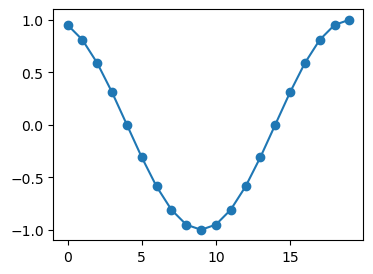

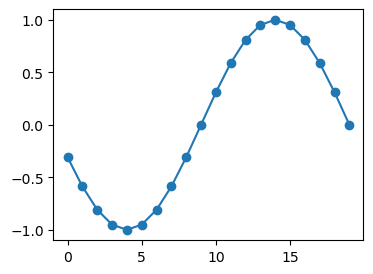

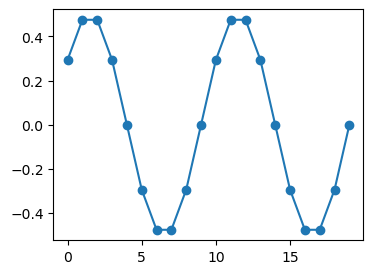

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff18be09bb0>

In [12]:
figure(1 ,figsize = (4,3)); plot(Mx,"o-");
figure(2, figsize = (4,3)); plot(My,"o-");
figure(3, figsize = (4,3)); plot(Mx_d,"o-")

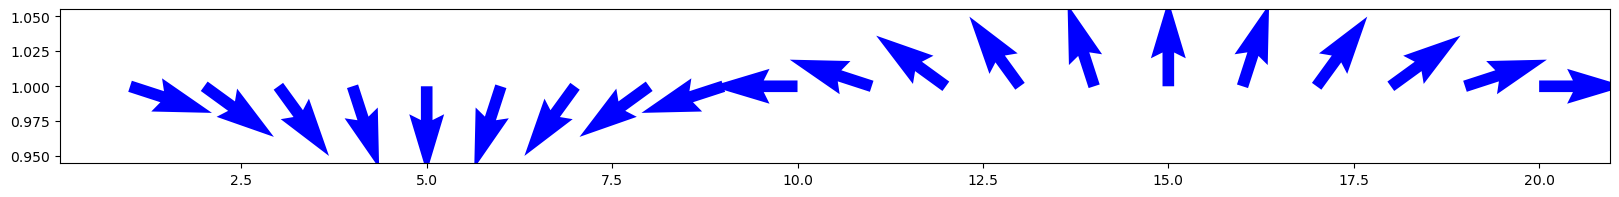

In [6]:
figure(1,figsize=(20,2));quiver(1:length(time_array), ones(length(time_array)), Mx, My, color="blue");


#### Exercise: Plot the magnetization vector during the time it takes to precess 4 cycles

## Complex value representation of magnetization vectors

In [48]:
i = complex(0,1);
M0 = 1 + 0i;
ω = 42.58e6; # Hz
time_per_cycle = 1/ω; # sec
time_array = time_per_cycle/20:time_per_cycle/20:time_per_cycle; 
time_array = Array(time_array);
M = exp.(-i*2π*ω*time_array);

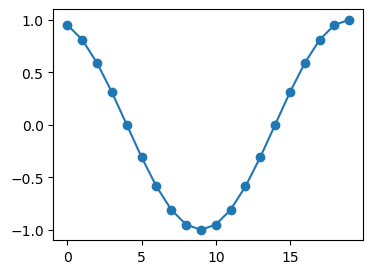

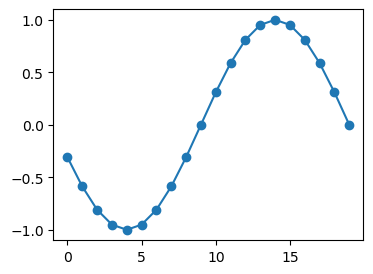

In [49]:
figure(1 ,figsize = (4,3)); plot(real.(M),"o-");
figure(2, figsize = (4,3)); plot(imag.(M),"o-");

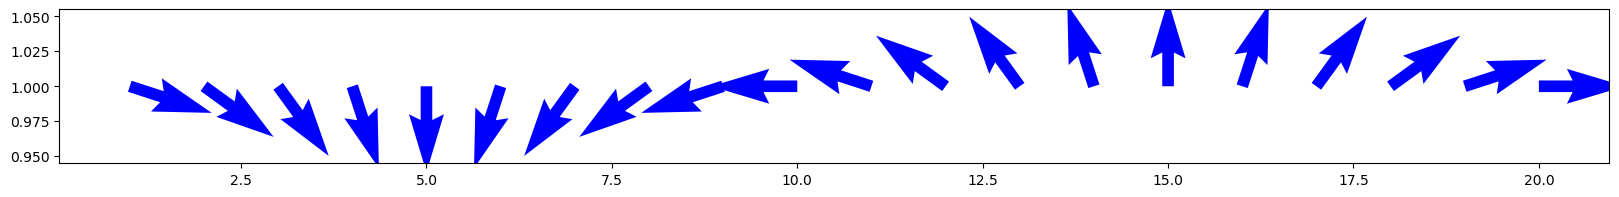

In [50]:
figure(1,figsize=(20,2));quiver(1:length(time_array), ones(length(time_array)), real.(M), imag.(M), color="blue");

#### Exercise: What if the initial magnetization vector $M(0)$ is not along the x-axis?

## Simulating MR signal acquisition: free induction decay (FID)
* The signals we receive, at any time point after an RF pulse excitation, will be the summation of all the magnetization vectors
* The 10240 data points we acquire at time = 1 to 10240 $\mu sec$, from a phantom comprising 10 isochromatic units, are $$ S(t) = \sum_{n=1}^{10} phantom[n] \ \cdot \exp(i2\pi \omega t) \cdot \exp(-\frac{t}{T_2}) \\ \textrm{with} \ \ t = 1 \    \textrm{to} \ 10240 \ \mu sec$$


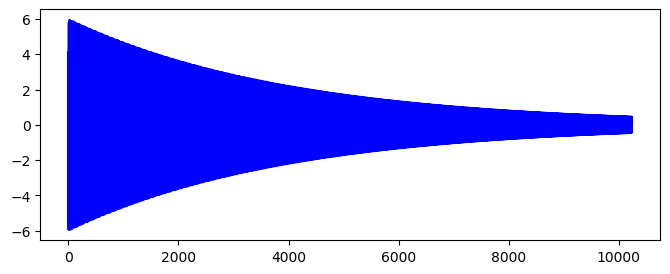

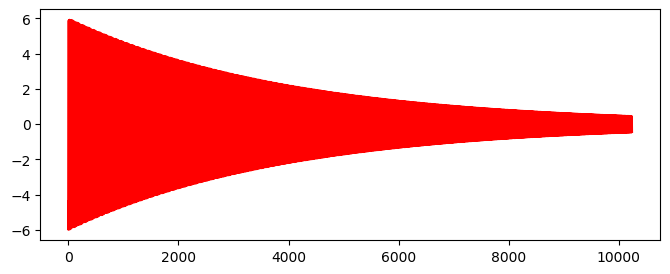

In [61]:
phantom = [0,0,0,1,1,1,1,1,1,0];
S = zeros(Complex{Float64},10240)
μsec = 1e-6
t = (1:10240)μsec
i = complex(0,1)
fieldStregth = 1.5
ω = 42.58e6 * fieldStregth
T2 = 4000μsec
for count = 1:10240
    S[count] = sum(phantom*exp(i*2*π*ω*t[count])*exp(-t[count]/T2))
end
fig = figure(figsize=(8,3));plot(1:10240,real.(S),"b")
fig = figure(figsize=(8,3));plot(1:10240,imag.(S),"r");

#### Exercise: Try different values of Larmor frequency and T2 relaxation time constant

## Simulating FID signal in the presence of field inhomogeneities

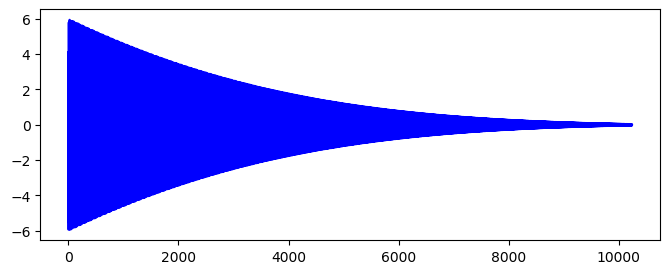

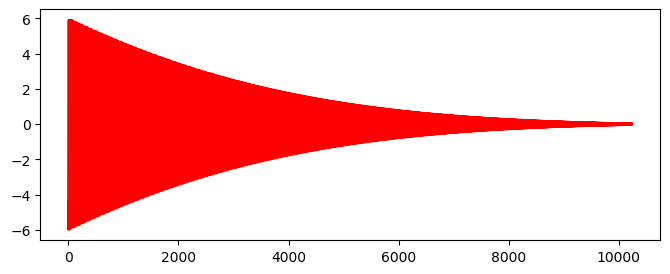

In [69]:
phantom = [0,0,0,1,1,1,1,1,1,0];
S = zeros(Complex{Float64},10240)
μsec = 1e-6
t = (1:10240)μsec
i = complex(0,1)
fieldStregth = 1.5
δω = [-20,-10,0,10,20,30,40,50, 60, 70]
ω = (42.58e6.+δω) * fieldStregth

T2 = 4000μsec
for count = 1:10240
    S[count] = sum(phantom.*exp.(i*2*π*ω*t[count])*exp(-t[count]/T2))
end
fig = figure(figsize=(8,3));plot(1:10240,real.(S),"b")
fig = figure(figsize=(8,3));plot(1:10240,imag.(S),"r");

## Simulating FID signal in the presence of field inhomogeneities

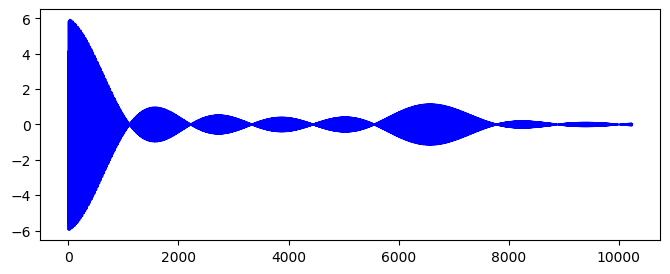

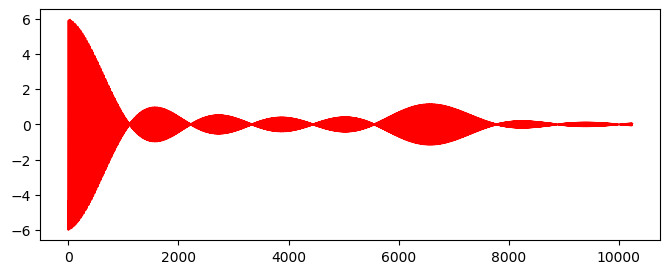

In [70]:
phantom = [0,0,0,1,1,1,1,1,1,0];
S = zeros(Complex{Float64},10240)
μsec = 1e-6
t = (1:10240)μsec
i = complex(0,1)
fieldStregth = 1.5
δω = [-200,-100,0,100,200,300,400,500, 600, 700]
ω = (42.58e6.+δω) * fieldStregth

T2 = 4000μsec
for count = 1:10240
    S[count] = sum(phantom.*exp.(i*2*π*ω*t[count])*exp(-t[count]/T2))
end
fig = figure(figsize=(8,3));plot(1:10240,real.(S),"b")
fig = figure(figsize=(8,3));plot(1:10240,imag.(S),"r");

## Homework 1: Simulating FID signals acquired in the rotating frame
Specifically, signals would be [demodulated](http://mriquestions.com/signal-squiggles.html
) first.

## Homework 2: Answer question 6 of the midterm exam from 2018
[midterm](Spring2018_midterm1.pdf)